In [1]:
import os
import sys
import numpy as np
import pywt

proj_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if proj_path not in sys.path:
    sys.path.append(proj_path)

from wavelet_filter import Wavelet_Filter
from utils import plot_original_vs_filtered, plot_signal, plot_scalogram
from scipy.datasets import electrocardiogram

In [2]:
ecg = electrocardiogram()
sr = 360
start = 1000
end = 2000

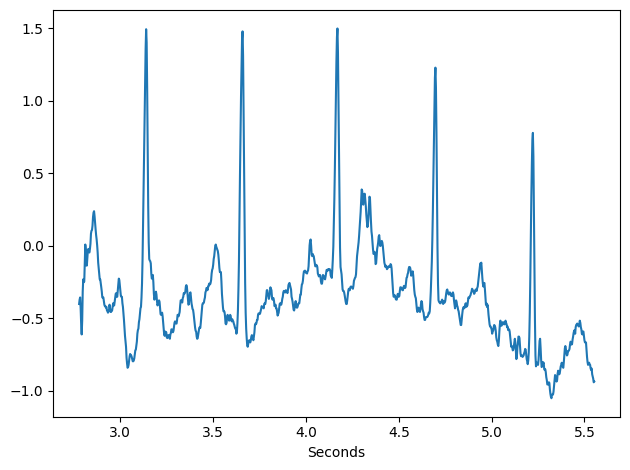

In [3]:
# Original ECG signal
plot_signal(x=ecg, sr = sr, start = start, end = end)

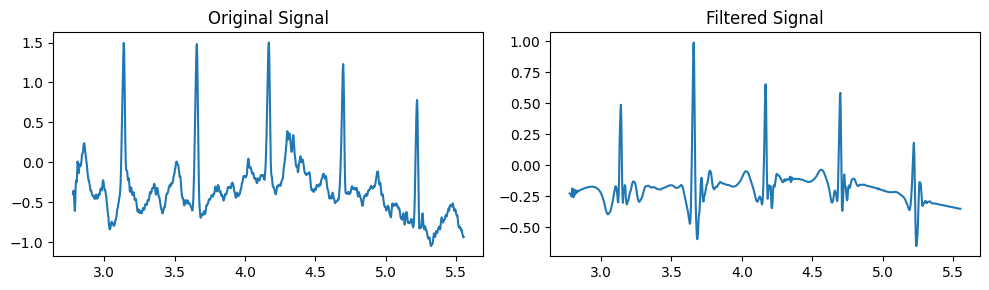

In [4]:
wavelet_filter = Wavelet_Filter(threshold_type="soft", wavelet="db5", 
                                level = 1, mode = "per", x = ecg)

reconstr = wavelet_filter._filter(scaling_factor=0.4, universal=False, operation="mean")
plot_original_vs_filtered(x = ecg, x_hat = reconstr, 
                            start = start, 
                            end = end, 
                            sr=sr)

In [5]:
# Scale to frequency conversion
sampling_period = 1/sr
wavelet = 'morl'
scales = np.arange(1.7, 60, 0.5)
freqs = pywt.scale2frequency(wavelet, scales)  / sampling_period
print(f'Max frequency: {np.max(freqs)} Hz')

Max frequency: 172.05882352941177 Hz


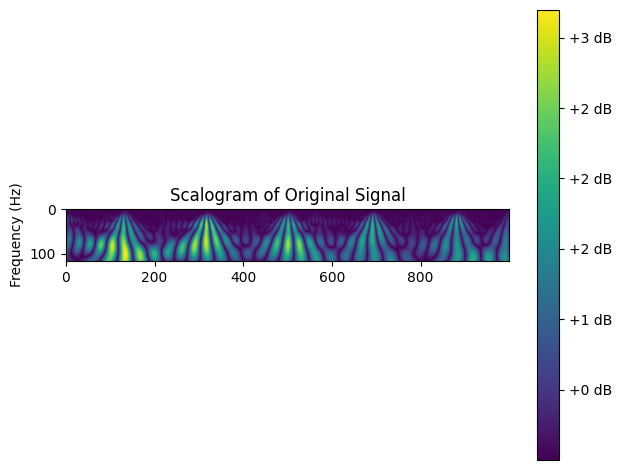

In [6]:
plot_scalogram(x = ecg[start:end], scales = scales, 
               fs = sr, title = "Scalogram of Original Signal", out_path=f'{proj_path}/plots')

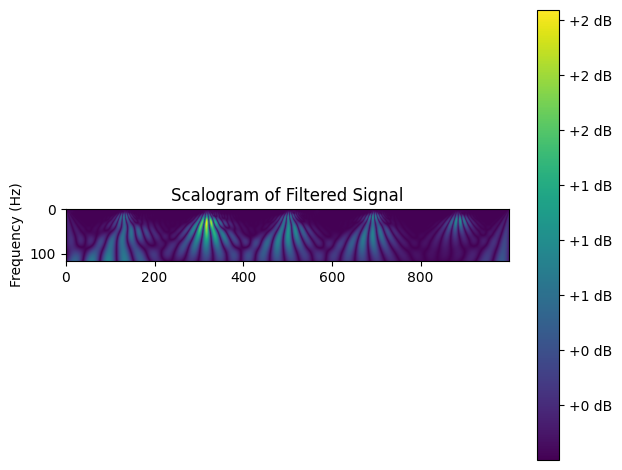

In [7]:
plot_scalogram(x = reconstr[start:end], scales = scales, 
               fs = sr, title = "Scalogram of Filtered Signal", out_path=f'{proj_path}/plots')